### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.display import display, HTML
display(HTML('<h1><center>Case Study - PwC Deal Analytics</center></h1>'))

In [3]:
display(HTML('<p><h3>The Dataset</h3></p>'))

#### Create a list containing a dataframe of the csv dataset for february in chunksizes of 10000 rows per dataframe. 

In [4]:
trip_list = []
ChunkSize = 10000

for chunk in pd.read_csv("./tripdata_file/yellow_tripdata_2018-02.csv", chunksize=ChunkSize):
    trip_list.append(chunk)

#### Create a list containing a dataframe of the csv dataset for August in chunksizes of 10000 rows per dataframe and append it to the list for february.

In [5]:
alltrip_list = trip_list

ChunkSize = 10000

for chunk in pd.read_csv("./tripdata_file/yellow_tripdata_2018-08.csv", chunksize=ChunkSize):
    alltrip_list.append(chunk)

#### Check the length of the list..

In [6]:
len(alltrip_list)

1635

### Concatenate the list of dataframes to create a single dataframe containing the two months under review..

In [7]:
df1 = pd.concat(alltrip_list, axis=0)

In [8]:
df1.shape   # To check the number of rows and column in the dataframe

(16341210, 17)

In [9]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.0,1,N,145,145,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.9,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.8,1,N,236,119,2,18.5,0.5,0.5,0.0,0.0,0.3,19.8
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.3,1,N,82,82,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.6,1,N,82,7,1,13.0,0.5,0.5,1.0,0.0,0.3,15.3


### Add Month Column


In [10]:
df1['Month'] = df1['tpep_pickup_datetime'].str[5:7]

## Convert the month column to interger 
df1['Month'] = df1['Month'].astype('int32')

In [11]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Month
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.0,1,N,145,145,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,2
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.9,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.8,1,N,236,119,2,18.5,0.5,0.5,0.0,0.0,0.3,19.8,2
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.3,1,N,82,82,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,2
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.6,1,N,82,7,1,13.0,0.5,0.5,1.0,0.0,0.3,15.3,2


In [12]:
display(HTML('<h2><center>Solving the Hypothesis</center></h2>'))

In [13]:
display(HTML('<p><h3>Travel pattern showing  what season people travel more between Winter and Summer.</h3></p>'))  
display(HTML('<ul><li><strong>Winter is February, and Summer is August.</strong></li></ul>'))

In [14]:
## Use the groupby function to group the month column into respective months
## sum all the corresponding values of the month for each rows

most_travelled_season = df1.groupby('Month').sum()


In [15]:
most_travelled_season

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
Month,,,,,,,,,,,,,,
1,1324,972,1912.68,686,107987,108128,915,8.284200e+03,244.00,330.00,1165.04,194.82,198.60,1.042251e+04
2,13265721,13554256,23520891.52,8810084,1390800849,1377042280,11058286,1.037481e+08,2772479.74,4225520.01,15524313.14,2572394.25,2544063.30,1.314127e+08
3,98,110,154.09,49,7951,8000,66,6.082000e+02,23.00,24.50,77.92,17.28,14.70,7.675500e+02
4,10,12,8.22,5,861,970,6,4.350000e+01,4.00,2.50,7.03,0.00,1.50,5.853000e+01
5,6,5,15.14,3,349,557,4,5.150000e+01,1.50,1.50,1.95,0.00,0.90,5.735000e+01
7,400,351,746.00,211,30902,28175,263,2.738500e+03,96.50,99.50,384.27,96.90,60.00,3.475670e+03
8,12611944,12574720,23736142.65,8246637,1266676179,1251726859,10428393,1.042089e+08,2738061.16,3901074.30,14286500.13,2834573.03,2350430.43,1.303464e+08
9,204,194,417.26,109,15636,16457,143,1.631000e+03,42.50,51.00,231.63,53.52,30.60,2.040250e+03
10,56,64,60.99,28,4535,4377,39,3.210000e+02,12.50,14.00,39.35,0.00,8.40,3.972000e+02


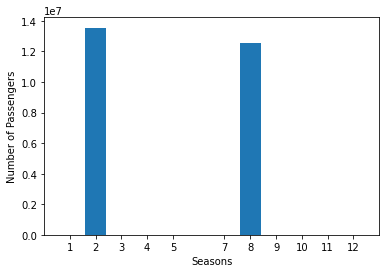

In [16]:
months = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]

plt.bar(months, most_travelled_season['passenger_count'])
plt.xticks(months)
plt.ylabel('Number of Passengers')
plt.xlabel('Seasons')
plt.show()

In [17]:
display(HTML('<p><em>The bar chart shows people travel more in winter than summer</em></p>'))

In [18]:
display(HTML('<p><h3>Do people take more trips in the evening?</h3></p>')) 

In [19]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Month
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.0,1,N,145,145,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,2
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.9,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.8,1,N,236,119,2,18.5,0.5,0.5,0.0,0.0,0.3,19.8,2
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.3,1,N,82,82,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,2
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.6,1,N,82,7,1,13.0,0.5,0.5,1.0,0.0,0.3,15.3,2


#### Convert the tpep_pickup_datetime column to a pandas datetime datatype.

In [20]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

#### Add new column for Day of the week

In [21]:
df1['DayofWeek'] = df1['tpep_pickup_datetime'].dt.day_name()


In [22]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Month,DayofWeek
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.00,1,N,145,145,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2,Thursday
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.90,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,2,Thursday
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.80,1,N,236,119,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80,2,Thursday
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.30,1,N,82,82,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2,Thursday
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.60,1,N,82,7,1,13.0,0.5,0.5,1.00,0.0,0.3,15.30,2,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849129,1,2018-08-31 23:54:46,2018-09-01 00:04:36,4,1.30,1,N,148,79,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,8,Friday
7849130,2,2018-08-31 23:24:09,2018-08-31 23:32:33,1,1.37,1,N,113,231,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,8,Friday
7849131,2,2018-08-31 23:35:09,2018-08-31 23:47:18,1,1.27,1,N,231,148,1,9.0,0.5,0.5,5.08,0.0,0.3,15.38,8,Friday
7849132,2,2018-08-31 23:55:23,2018-09-01 00:06:14,1,2.08,1,N,114,87,1,9.5,0.5,0.5,1.08,0.0,0.3,11.88,8,Friday


#### Add an hour column


In [23]:
df1['HourofDay'] = df1['tpep_pickup_datetime'].dt.hour


In [24]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Month,DayofWeek,HourofDay
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.00,1,N,145,145,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2,Thursday,0
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.90,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,2,Thursday,0
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.80,1,N,236,119,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80,2,Thursday,0
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.30,1,N,82,82,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2,Thursday,0
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.60,1,N,82,7,1,13.0,0.5,0.5,1.00,0.0,0.3,15.30,2,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849129,1,2018-08-31 23:54:46,2018-09-01 00:04:36,4,1.30,1,N,148,79,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,8,Friday,23
7849130,2,2018-08-31 23:24:09,2018-08-31 23:32:33,1,1.37,1,N,113,231,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,8,Friday,23
7849131,2,2018-08-31 23:35:09,2018-08-31 23:47:18,1,1.27,1,N,231,148,1,9.0,0.5,0.5,5.08,0.0,0.3,15.38,8,Friday,23
7849132,2,2018-08-31 23:55:23,2018-09-01 00:06:14,1,2.08,1,N,114,87,1,9.5,0.5,0.5,1.08,0.0,0.3,11.88,8,Friday,23


In [25]:
daily_trip = df1.groupby('HourofDay').sum()['passenger_count']


In [26]:
daily_trip.head(8)

HourofDay
0    816499
1    564952
2    411009
3    292253
4    226178
5    247510
6    566431
7    918013
Name: passenger_count, dtype: int64

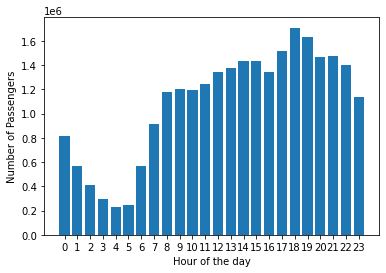

In [27]:
hours = range(0,24)

plt.bar(hours, daily_trip)
plt.xticks(hours)
plt.ylabel('Number of Passengers')
plt.xlabel('Hour of the day')
plt.show()

In [28]:
display(HTML('<p><em>The bar chart shows people take more trips in the evening.</em></p>'))

In [29]:
display(HTML('<p><h3>Do people tip more on weekends?</h3></p>'))

In [30]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Month,DayofWeek,HourofDay
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.0,1,N,145,145,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,2,Thursday,0
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.9,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2,Thursday,0
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.8,1,N,236,119,2,18.5,0.5,0.5,0.0,0.0,0.3,19.8,2,Thursday,0
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.3,1,N,82,82,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,2,Thursday,0
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.6,1,N,82,7,1,13.0,0.5,0.5,1.0,0.0,0.3,15.3,2,Thursday,0


In [31]:
most_tipped_day = df1.groupby('DayofWeek').sum()['tip_amount']



In [32]:
most_tipped_day

DayofWeek
Friday       4847031.97
Monday       3796848.44
Saturday     3538160.37
Sunday       3329878.01
Thursday     5160285.24
Tuesday      4164172.14
Wednesday    4976456.35
Name: tip_amount, dtype: float64

In [33]:
## use a list comprehension to get a list of the days of the week for the xticks.
days_of_week = [day for day, df in df1.groupby('DayofWeek')]


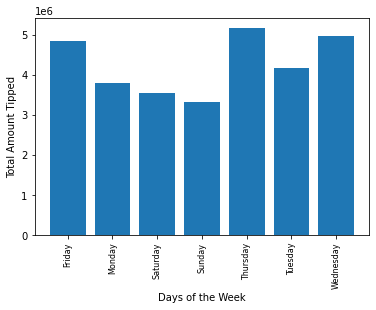

In [34]:
plt.bar(days_of_week, most_tipped_day)
plt.xticks(days_of_week, rotation='vertical', size=8)
plt.ylabel('Total Amount Tipped')
plt.xlabel('Days of the Week')
plt.show()

In [35]:
display(HTML('<p><em>The bar chart shows people tip more on Thursday, Wednesday and closely followed by Friday and not weekends.</em></p>'))

In [36]:
display(HTML('<p><h3>Do people take longer duration trips on weekends?</h3></p>'))

In [37]:
longer_duration_trip_day = df1.groupby('DayofWeek').sum()['trip_distance']


In [38]:
longer_duration_trip_day

DayofWeek
Friday       7544779.53
Monday       6163211.65
Saturday     6099906.43
Sunday       6018321.77
Thursday     7697790.42
Tuesday      6317171.39
Wednesday    7419490.90
Name: trip_distance, dtype: float64

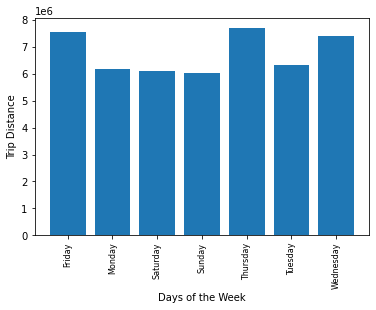

In [39]:
plt.bar(days_of_week, longer_duration_trip_day)
plt.xticks(days_of_week, rotation='vertical', size=8)
plt.ylabel('Trip Distance')
plt.xlabel('Days of the Week')
plt.show()

In [40]:
display(HTML('<p><em>The bar chart shows people take longer duration trips on Thursday, followed by Friday and Wednesday and not weekends.</em></p>'))